In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv("Downloads/Netflix Dataset.csv")

In [7]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [9]:
data.shape

(7789, 11)

In [10]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [11]:
data.duplicated().value_counts()

False    7787
True        2
Name: count, dtype: int64

In [12]:
data.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [13]:
data.drop_duplicates(inplace= True)

In [14]:
data['Director'] = data['Director'].fillna('Unknown')
data['Cast'] = data['Cast'].fillna('Unknown')
data['Country'] = data['Country'].fillna('Unknown')
data['Rating'] = data['Rating'].fillna('Unknown')

In [15]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [16]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')


In [17]:
data.dropna(subset=['Release_Date'], inplace=True)

In [18]:
data.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [19]:
data.reset_index(drop=True, inplace=True)


In [20]:
data['Duration'].unique()[:10]


array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min'], dtype=object)

In [21]:
data['Duration_Num'] = data['Duration'].str.extract('(\d+)')


In [22]:
data['Duration_Num'] = pd.to_numeric(data['Duration_Num'], errors='coerce')


In [23]:
data['Duration_Type'] = data['Duration'].apply(lambda x: 'min' if 'min' in x else 'Season')


In [24]:
data['Rating'] = data['Rating'].str.strip()
data['Country'] = data['Country'].str.strip()


In [25]:
data['Type'].unique()


array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [28]:
movies = data[data['Type'] == 'Movie']
tvshows = data[data['Type'] == 'TV Show']


In [30]:
data['Type'].value_counts().to_frame()


,count
Type,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
"Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows",1
"International Movies, Romantic Movies, Sci-Fi & Fantasy",1
"Crime TV Shows, International TV Shows, Reality TV",1


In [36]:
genre_data = data.assign(Genre=data['Category'].str.split(', ')).explode('Genre')


In [37]:
genre_count = genre_data['Genre'].value_counts().reset_index()
genre_count.columns = ['Genre', 'Count']


In [38]:
genre_count.head(10)


,Genre,Count
0,Movie,5377
1,TV Show,2312


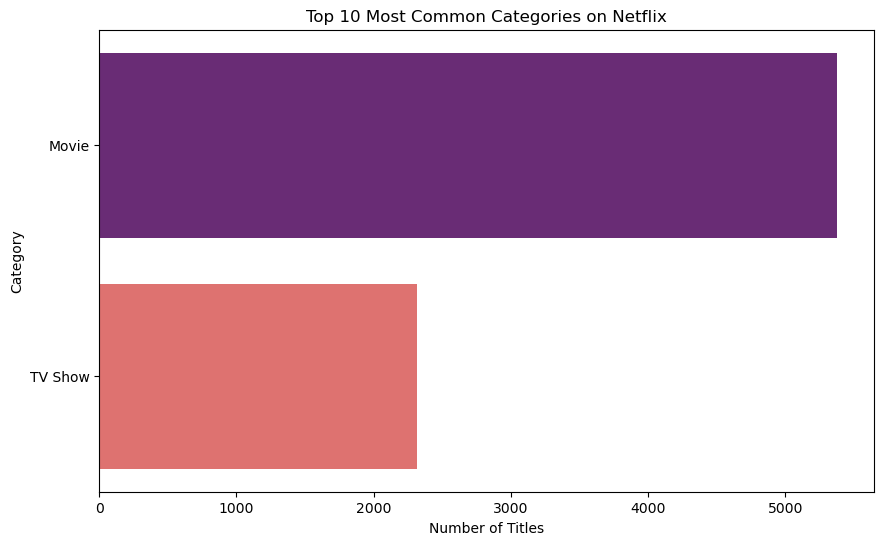

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Count',
    y='Genre',
    data=genre_count.head(10),
    hue='Genre',
    palette='magma',
    legend=False
)
plt.title('Top 10 Most Common Categories on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Category')
plt.show()


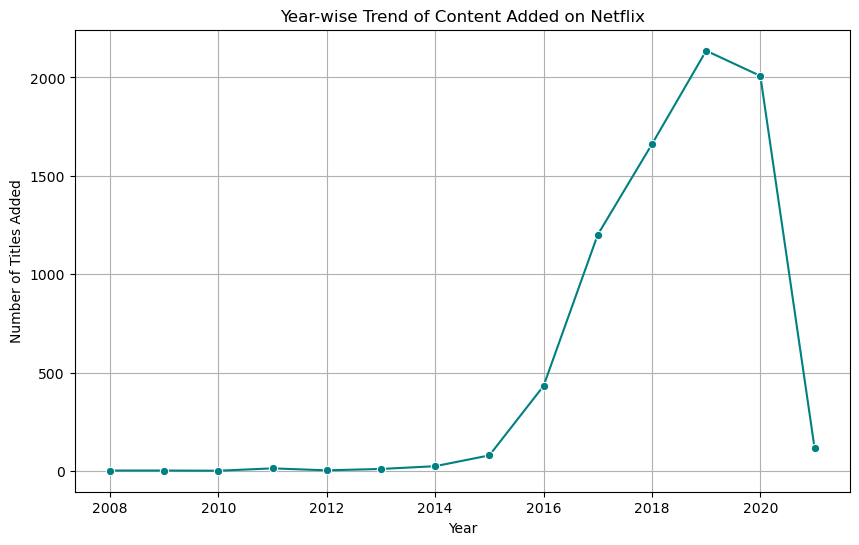

In [43]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')
data['Year'] = data['Release_Date'].dt.year

# Count number of titles per year
yearly_content = data['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o', color='teal')
plt.title('Year-wise Trend of Content Added on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

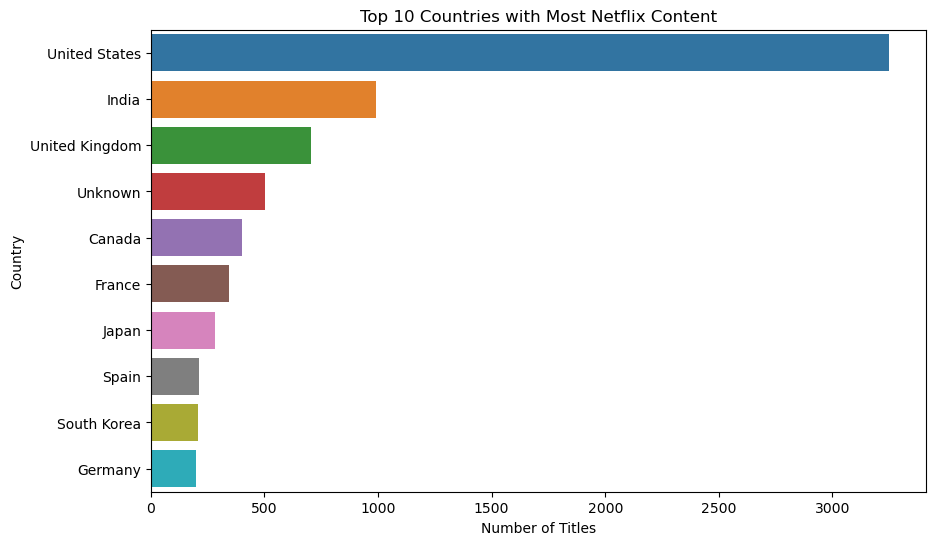

In [51]:
country_data = data.assign(Country=data['Country'].str.split(', ')).explode('Country')
top_countries = country_data['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values,
            y=top_countries.index, 
            hue=top_countries.index)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()



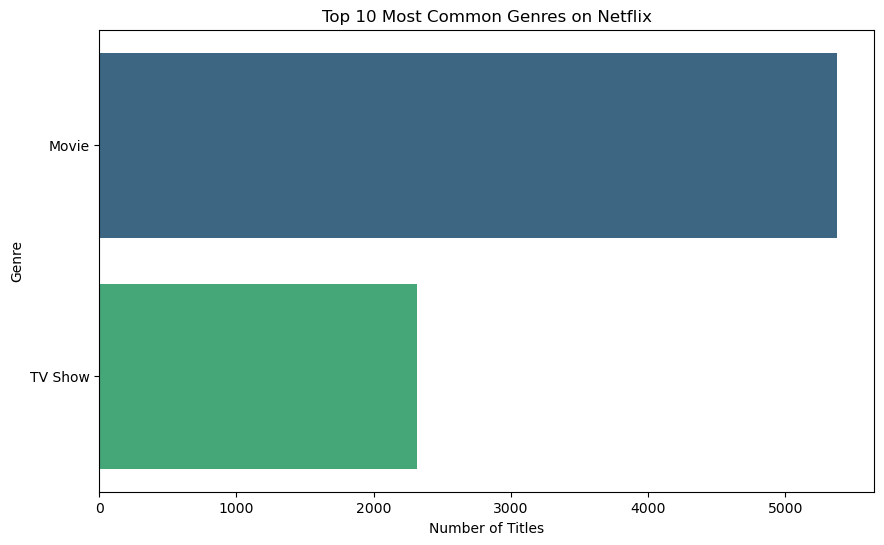

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_count.values,
    y=genre_count.index,
    hue=genre_count.index,    # required for palette
    palette='viridis',
    legend=False
)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


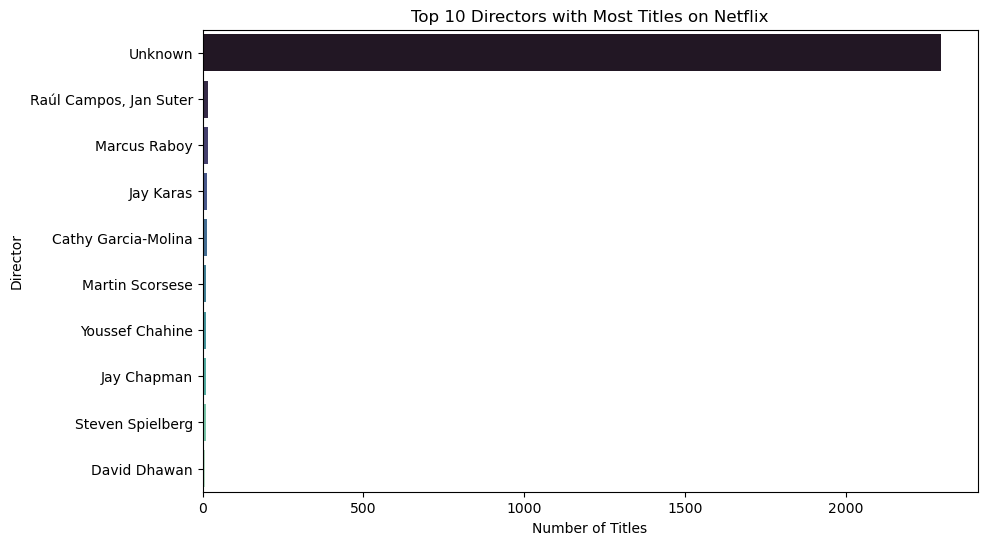

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,
    palette='mako',
    legend=False
)
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


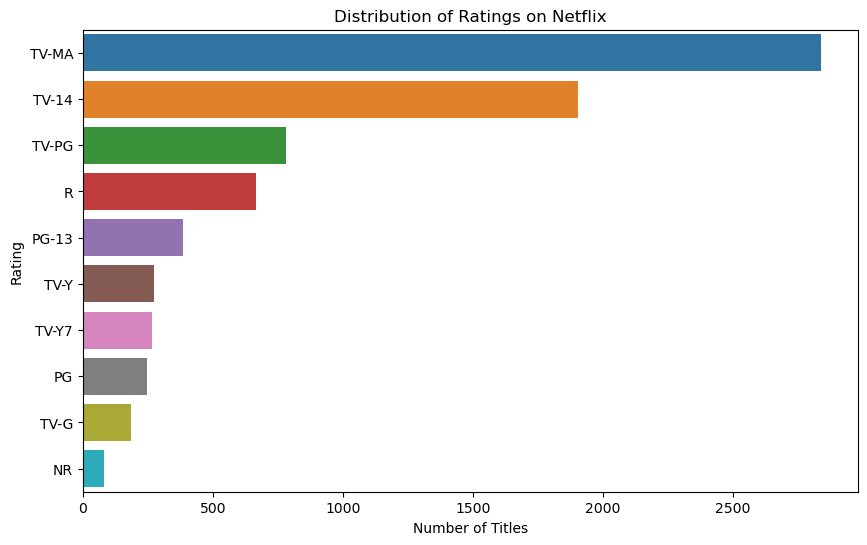

In [52]:
rating_count = data['Rating'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rating_count.values, y=rating_count.index, hue=rating_count.index)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

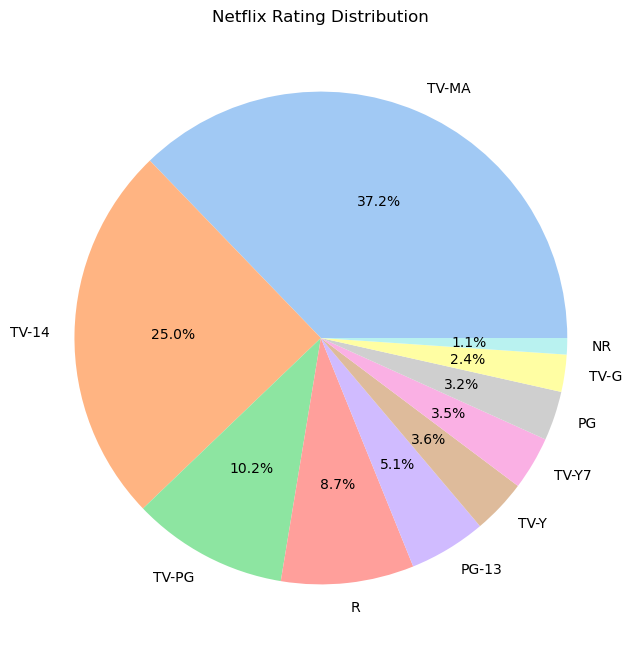

In [53]:
plt.figure(figsize=(8,8))
plt.pie(rating_count.values, labels=rating_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Netflix Rating Distribution')
plt.show()